In [ ]:
#%matplotlib notebook

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
plt.rcParams['figure.figsize'] = [13, 8]

In [7]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\df_prdf_zro2.pkl')
df_zro2 = pd.read_pickle(path)
df_zro2

structure  \
0     [[1.39842671 2.40664143 4.37446042] Zr, [3.615...   
1     [[1.41037568 2.41800359 4.39765312] Zr, [3.632...   
2     [[-8.63451586 -8.02576822 -6.33664411] Zr, [-6...   
3     [[ 1.30468543 -7.65082882  3.77109169] Zr, [ 3...   
4     [[1.38880269 2.40992106 4.37773968] Zr, [3.657...   
...                                                 ...   
1720  [[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...   
1721  [[  1.25503143 -10.19349096  -3.47224897] Zr, ...   
1722  [[ -8.73042916 -10.14298992   2.09308249] Zr, ...   
1723  [[-8.87228424  9.95995753 -4.04166983] Zr, [-8...   
1724  [[1.2716803  9.96087029 1.28860667] Zr, [1.271...   

                                name  Zr-Zr PRDF r=0.00-0.50  \
0        Ag_ZrO2_cat_3.125_222_m.cif                     0.0   
1        Ag_ZrO2_cat_3.125_222_o.cif                     0.0   
2      Ag_ZrO2_cat_3.125_222_p-o.cif                     0.0   
3        Ag_ZrO2_cat_3.125_222_t.cif                     0.0   
4         Ag_ZrO2_cat_6.25_122_m.cif                     0.0   
...                              ...                     ...   
1720    Zr_ZrO2_inter_6.25_212_t.cif                     0.0   
1721    Zr_ZrO2_inter_6.25_221_m.cif                     0.0   
1722    Zr_ZrO2_inter_6.25_221_o.cif                     0.0   
1723  Zr_ZrO2_inter_6.25_221_p-o.cif                     0.0   
1724    Zr_ZrO2_inter_6.25_221_t.cif                     0.0   

      Zr-Zr PRDF r=0.50-1.00  Zr-Zr PRDF r=1.00-1.50  Zr-Zr PRDF r=1.50-2.00  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                     0.0   
1721                     0.0                     0.0                     0.0   
1722                     0.0                     0.0                     0.0   
1723                     0.0                     0.0                     0.0   
1724                     0.0                     0.0                     0.0   

      Zr-Zr PRDF r=2.00-2.50  Zr-Zr PRDF r=2.50-3.00  Zr-Zr PRDF r=3.00-3.50  \
0                        0.0                0.000000                0.088289   
1                        0.0                0.000000                0.097991   
2                        0.0                0.000000                0.074706   
3                        0.0                0.000000                0.001940   
4                        0.0                0.000000                0.086219   
...                      ...                     ...                     ...   
1720                     0.0                0.014815                0.028307   
1721                     0.0                0.009876                0.076076   
1722                     0.0                0.012346                0.081384   
1723                     0.0                0.014815                0.028307   
1724                     0.0                0.014815                0.028307   

      Zr-Zr PRDF r=3.50-4.00  ...  O-O PRDF r=15.00-15.50  \
0                   0.042287  ...                0.061330   
1                   0.041558  ...                0.062549   
2                   0.075097  ...                0.066505   
3                   0.129779  ...                0.073647   
4                   0.040683  ...                0.061586   
...                      ...  ...                     ...   
1720                0.106362  ...                0.068600   
1721                0.041215  ...                0.057951   
1722                0.038556  ...                0.057566   
1723                0.106362  ...   

In [8]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\df_prdf_hfo2.pkl')
df_hfo2 = pd.read_pickle(path)
df_hfo2

structure  \
0     [[1.38867986 2.3864784  4.36482979] Hf, [3.587...   
1     [[1.40181386 2.3944349  4.3885007 ] Hf, [3.606...   
2     [[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...   
3     [[-8.73105937  2.58337834  3.5977214 ] Hf, [-6...   
4     [[1.37820795 2.39009891 4.37039843] Hf, [3.622...   
...                                                 ...   
1720  [[ 1.26076304 -5.11876687  1.26075093] Hf, [ 1...   
1721  [[  1.2262443  -10.12402918  -3.43749088] Hf, ...   
1722  [[1.39997305 0.20795941 1.85144277] Hf, [1.451...   
1723  [[-8.97250742 -0.20890362  1.50328354] Hf, [-8...   
1724  [[1.26076659 9.90848891 1.27892142] Hf, [1.260...   

                                name  Hf-Hf PRDF r=0.00-0.50  \
0        Ag_HfO2_cat_3.125_222_m.cif                     0.0   
1        Ag_HfO2_cat_3.125_222_o.cif                     0.0   
2      Ag_HfO2_cat_3.125_222_p-o.cif                     0.0   
3        Ag_HfO2_cat_3.125_222_t.cif                     0.0   
4         Ag_HfO2_cat_6.25_122_m.cif                     0.0   
...                              ...                     ...   
1720    Zr_HfO2_inter_6.25_212_t.cif                     0.0   
1721    Zr_HfO2_inter_6.25_221_m.cif                     0.0   
1722    Zr_HfO2_inter_6.25_221_o.cif                     0.0   
1723  Zr_HfO2_inter_6.25_221_p-o.cif                     0.0   
1724    Zr_HfO2_inter_6.25_221_t.cif                     0.0   

      Hf-Hf PRDF r=0.50-1.00  Hf-Hf PRDF r=1.00-1.50  Hf-Hf PRDF r=1.50-2.00  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                     0.0   
1721                     0.0                     0.0                     0.0   
1722                     0.0                     0.0                     0.0   
1723                     0.0                     0.0                     0.0   
1724                     0.0                     0.0                     0.0   

      Hf-Hf PRDF r=2.00-2.50  Hf-Hf PRDF r=2.50-3.00  Hf-Hf PRDF r=3.00-3.50  \
0                        0.0                     0.0                0.092170   
1                        0.0                     0.0                0.100902   
2                        0.0                     0.0                0.086349   
3                        0.0                     0.0                0.011643   
4                        0.0                     0.0                0.090230   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                0.030077   
1721                     0.0                     0.0                0.082710   
1722                     0.0                     0.0                0.086470   
1723                     0.0                     0.0                0.056393   
1724                     0.0                     0.0                0.030077   

      Hf-Hf PRDF r=3.50-4.00  ...  O-O PRDF r=15.00-15.50  \
0                   0.047391  ...                0.055107   
1                   0.043016  ...                0.064922   
2                   0.066347  ...                0.062933   
3                   0.122488  ...                0.069220   
4                   0.045204  ...                0.055043   
...                      ...  ...                     ...   
1720                0.113009  ...                0.066034   
1721                0.040966  ...                0.057523   
1722                0.038141  ...                0.061073   
1723                0.088995  ...   

In [18]:
df = df_hfo2.append(df_zro2)
df = df.fillna(0)
df

structure  \
0     [[1.38867986 2.3864784  4.36482979] Hf, [3.587...   
1     [[1.40181386 2.3944349  4.3885007 ] Hf, [3.606...   
2     [[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...   
3     [[-8.73105937  2.58337834  3.5977214 ] Hf, [-6...   
4     [[1.37820795 2.39009891 4.37039843] Hf, [3.622...   
...                                                 ...   
1720  [[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...   
1721  [[  1.25503143 -10.19349096  -3.47224897] Zr, ...   
1722  [[ -8.73042916 -10.14298992   2.09308249] Zr, ...   
1723  [[-8.87228424  9.95995753 -4.04166983] Zr, [-8...   
1724  [[1.2716803  9.96087029 1.28860667] Zr, [1.271...   

                                name  Hf-Hf PRDF r=0.00-0.50  \
0        Ag_HfO2_cat_3.125_222_m.cif                     0.0   
1        Ag_HfO2_cat_3.125_222_o.cif                     0.0   
2      Ag_HfO2_cat_3.125_222_p-o.cif                     0.0   
3        Ag_HfO2_cat_3.125_222_t.cif                     0.0   
4         Ag_HfO2_cat_6.25_122_m.cif                     0.0   
...                              ...                     ...   
1720    Zr_ZrO2_inter_6.25_212_t.cif                     0.0   
1721    Zr_ZrO2_inter_6.25_221_m.cif                     0.0   
1722    Zr_ZrO2_inter_6.25_221_o.cif                     0.0   
1723  Zr_ZrO2_inter_6.25_221_p-o.cif                     0.0   
1724    Zr_ZrO2_inter_6.25_221_t.cif                     0.0   

      Hf-Hf PRDF r=0.50-1.00  Hf-Hf PRDF r=1.00-1.50  Hf-Hf PRDF r=1.50-2.00  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                     0.0   
1721                     0.0                     0.0                     0.0   
1722                     0.0                     0.0                     0.0   
1723                     0.0                     0.0                     0.0   
1724                     0.0                     0.0                     0.0   

      Hf-Hf PRDF r=2.00-2.50  Hf-Hf PRDF r=2.50-3.00  Hf-Hf PRDF r=3.00-3.50  \
0                        0.0                     0.0                0.092170   
1                        0.0                     0.0                0.100902   
2                        0.0                     0.0                0.086349   
3                        0.0                     0.0                0.011643   
4                        0.0                     0.0                0.090230   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                0.000000   
1721                     0.0                     0.0                0.000000   
1722                     0.0                     0.0                0.000000   
1723                     0.0                     0.0                0.000000   
1724                     0.0                     0.0                0.000000   

      Hf-Hf PRDF r=3.50-4.00  ...  Zr-O PRDF r=15.00-15.50  \
0                   0.047391  ...                 0.000000   
1                   0.043016  ...                 0.000000   
2                   0.066347  ...                 0.000000   
3                   0.122488  ...                 0.000000   
4                   0.045204  ...                 0.000000   
...                      ...  ...                      ...   
1720                0.000000  ...                 0.050396   
1721                0.000000  ...                 0.059372   
1722                0.000000  ...                 0.063237   
1723                0.0000

In [19]:
labels_true_hfo2 = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true_hfo2 = labels_true_hfo2.labels_0_4

labels_true_zro2 = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_zro2.pkl')
labels_true_zro2 = labels_true_zro2.labels_0_4

labels_true = labels_true_hfo2.append(labels_true_zro2)
labels_true = labels_true.values
labels_true

array(['m', 'o', 'p-o', ..., 'o', 'unknown', 't'], dtype=object)

In [20]:
from sklearn.utils import shuffle

X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

Hf-Hf PRDF r=0.00-0.50  Hf-Hf PRDF r=0.50-1.00  Hf-Hf PRDF r=1.00-1.50  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                     0.0   
1721                     0.0                     0.0                     0.0   
1722                     0.0                     0.0                     0.0   
1723                     0.0                     0.0                     0.0   
1724                     0.0                     0.0                     0.0   

      Hf-Hf PRDF r=1.50-2.00  Hf-Hf PRDF r=2.00-2.50  Hf-Hf PRDF r=2.50-3.00  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                     0.0   
1721                     0.0                     0.0                     0.0   
1722                     0.0                     0.0                     0.0   
1723                     0.0                     0.0                     0.0   
1724                     0.0                     0.0                     0.0   

      Hf-Hf PRDF r=3.00-3.50  Hf-Hf PRDF r=3.50-4.00  Hf-Hf PRDF r=4.00-4.50  \
0                   0.092170                0.047391                0.007949   
1                   0.100902                0.043016                0.002271   
2                   0.086349                0.066347                0.000000   
3                   0.011643                0.122488                0.000000   
4                   0.090230                0.045204                0.007041   
...                      ...                     ...                     ...   
1720                0.000000                0.000000                0.000000   
1721                0.000000                0.000000                0.000000   
1722                0.000000                0.000000                0.000000   
1723                0.000000                0.000000                0.000000   
1724                0.000000                0.000000                0.000000   

      Hf-Hf PRDF r=4.50-5.00  ...  Zr-O PRDF r=15.00-15.50  \
0                   0.003183  ...                 0.000000   
1                   0.005911  ...                 0.000000   
2                   0.016823  ...                 0.000000   
3                   0.005456  ...                 0.000000   
4                   0.002819  ...                 0.000000   
...                      ...  ...                      ...   
1720                0.000000  ...                 0.050396   
1721                0.000000  ...                 0.059372   
1722                0.000000  ...                 0.063237   
1723                0.000000  ...                 0.050436   
1724                0.000000  ...                 0.050718   

      Zr-O PRDF r=15.50-16.00  Zr-O PRDF r=16.00-16.50  \
0                    0.000000                 0.000000   
1                    0.000000                 0.000000   
2                    0.000000                 0.000000   
3                    0.000000                 0.000000   
4                    0.000000                 0.000000   
...                       ... 

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.70575105, 0.81416435,
        0.64180799],
       [0.        , 0.        , 0.        , ..., 0.67752101, 0.96581876,
        0.55878805],
       [0.        , 0.        , 0.        , ..., 0.67752101, 0.96581876,
        0.55878805]])

In [22]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

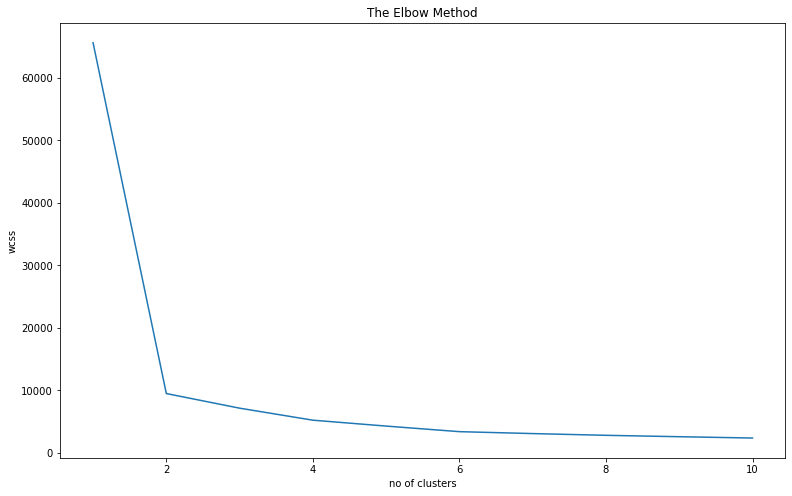

In [23]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([85.6, 91.1, 93.7, 95.3, 96. , 96.6, 97.1, 97.5, 97.8, 98.1, 98.3,
       98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4])

In [ ]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [25]:
pca = PCA(n_components=4)
PCA = pca.fit_transform(X)

In [26]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [27]:
from sklearn import metrics
metrics.silhouette_score(PCA, PCA_labels, metric='l2')

0.6900564523306697

In [28]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = labels_true
#dfPCA.columns = ['x1','x2','x3','cluster', 'labels']
dfPCA.head(30)

0         1         2         3  cluster   labels
0   4.108925 -0.691181 -0.659261 -0.345536        1        m
1   4.072309 -0.669077 -0.681364 -0.068782        1        o
2   4.121442 -0.047212  0.517008  1.045713        4      p-o
3   3.930136  1.909060  1.494217 -0.375754        3        t
4   4.052340 -0.608971 -0.615513 -0.267311        1        m
5   4.065599 -0.089225  0.480192  1.082038        4      p-o
6   3.986126  0.653546  0.472413 -0.151146        4  unknown
7   4.033849 -0.624380 -0.654122 -0.399804        1        m
8   4.016607 -0.667747 -0.619551 -0.016503        1        o
9   4.072896 -0.069270  0.469737  1.062806        4      p-o
10  3.985596  0.654654  0.473018 -0.151081        4  unknown
11  4.044166 -0.589949 -0.606484 -0.301705        1        m
12  4.016302 -0.665383 -0.616195 -0.027691        1        o
13  4.059945 -0.086400  0.453647  0.996278        4      p-o
14  3.986104  0.652800  0.473302 -0.148327        4  unknown
15  4.117876 -0.708072 -0.756594 -0.492390        1        m
16  4.080315 -0.696648 -0.745121 -0.280488        1        o
17  4.087390  0.011662  0.463484  0.868206        4      p-o
18  3.917193  1.852715  1.283402 -0.484962        3        t
19  4.075320 -0.683996 -0.752951 -0.526418        1        m
20  4.061192 -0.097726  0.167013  0.587293        4      p-o
21  3.981490 -0.071001 -0.240761 -0.174453        1  unknown
22  4.066497 -0.654455 -0.760285 -0.539645        1        m
23  4.037156 -0.658667 -0.707560 -0.332653        1        o
24  4.024598 -0.087774  0.276599  0.718482        4      p-o
25  3.872871  1.540436  0.872931 -0.421418        3        t
26  4.078957 -0.689772 -0.770577 -0.496280        1        m
27  4.048092 -0.727134 -0.750265 -0.316608        1        o
28  4.049069 -0.208161 -0.035730  0.498276        4  unknown
29  4.011988  0.192034 -0.010717 -0.076117        4  unknown

In [ ]:
dfPCA2 = dfPCA.iloc[:, [0, 1]].copy()
dfPCA2 = dfPCA2.rename(columns={0: 'PC1', 1: 'PC2'})
dfPCA2['cluster'] = dfPCA[['cluster']]
lm = sns.lmplot(data=dfPCA2, x='PC1', y='PC2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters", fontsize=12)

In [ ]:
dfPCA2 = dfPCA.iloc[:, [0, 1]].copy()
dfPCA2 = dfPCA2.rename(columns={0: 'PC1', 1: 'PC2'})
dfPCA2['labels'] = dfPCA[['labels']]
lm = sns.lmplot(data=dfPCA2, x='PC1', y='PC2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth Clusters ", fontsize=12)

In [29]:
import plotly.express as px
dfPCA3 = dfPCA.iloc[:, [0, 1, 2]].copy()
dfPCA3 = dfPCA3.rename(columns={0: 'x1', 1: 'x2', 2:'x3'})
dfPCA3['cluster'] = dfPCA[['cluster']]
fig = px.scatter_3d(
    dfPCA3, x='x1', y='x2', z='x3', color=dfPCA3['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D K-means, PRDF'
)
fig.show()

In [30]:
import plotly.express as px
dfPCA3 = dfPCA.iloc[:, [0, 1, 2]].copy()
dfPCA3 = dfPCA3.rename(columns={0: 'x1', 1: 'x2', 2:'x3'})
dfPCA3['labels'] = dfPCA[['labels']]
fig = px.scatter_3d(
    dfPCA3, x='x1', y='x2', z='x3', color=dfPCA3['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth, PRDF'
)
fig.show()

In [31]:
dfPCA.head(30)

0         1         2         3  cluster   labels
0   4.108925 -0.691181 -0.659261 -0.345536        1        m
1   4.072309 -0.669077 -0.681364 -0.068782        1        o
2   4.121442 -0.047212  0.517008  1.045713        4      p-o
3   3.930136  1.909060  1.494217 -0.375754        3        t
4   4.052340 -0.608971 -0.615513 -0.267311        1        m
5   4.065599 -0.089225  0.480192  1.082038        4      p-o
6   3.986126  0.653546  0.472413 -0.151146        4  unknown
7   4.033849 -0.624380 -0.654122 -0.399804        1        m
8   4.016607 -0.667747 -0.619551 -0.016503        1        o
9   4.072896 -0.069270  0.469737  1.062806        4      p-o
10  3.985596  0.654654  0.473018 -0.151081        4  unknown
11  4.044166 -0.589949 -0.606484 -0.301705        1        m
12  4.016302 -0.665383 -0.616195 -0.027691        1        o
13  4.059945 -0.086400  0.453647  0.996278        4      p-o
14  3.986104  0.652800  0.473302 -0.148327        4  unknown
15  4.117876 -0.708072 -0.756594 -0.492390        1        m
16  4.080315 -0.696648 -0.745121 -0.280488        1        o
17  4.087390  0.011662  0.463484  0.868206        4      p-o
18  3.917193  1.852715  1.283402 -0.484962        3        t
19  4.075320 -0.683996 -0.752951 -0.526418        1        m
20  4.061192 -0.097726  0.167013  0.587293        4      p-o
21  3.981490 -0.071001 -0.240761 -0.174453        1  unknown
22  4.066497 -0.654455 -0.760285 -0.539645        1        m
23  4.037156 -0.658667 -0.707560 -0.332653        1        o
24  4.024598 -0.087774  0.276599  0.718482        4      p-o
25  3.872871  1.540436  0.872931 -0.421418        3        t
26  4.078957 -0.689772 -0.770577 -0.496280        1        m
27  4.048092 -0.727134 -0.750265 -0.316608        1        o
28  4.049069 -0.208161 -0.035730  0.498276        4  unknown
29  4.011988  0.192034 -0.010717 -0.076117        4  unknown

In [32]:
def sort_clusterlabels(df_kmeans):
    df_times = df_kmeans.groupby(["labels", "cluster"]).size().reset_index(name="Time")
    
    unknown_df = df_times[df_times['labels'].str.match('unknown')]
    m_df = df_times[df_times['labels'].str.match('m')]
    po_df = df_times[df_times['labels'].str.match('p-o')]
    o_df = df_times[df_times['labels'].str.match('o')]
    t_df = df_times[df_times['labels'].str.match('t')]
    
    unk_newlabel = unknown_df.loc[unknown_df['Time'] == unknown_df.Time.max(), 'cluster'].values[0]
    m_newlabel = m_df.loc[m_df['Time'] == m_df.Time.max(), 'cluster'].values[0]
    po_newlabel = po_df.loc[po_df['Time'] == po_df.Time.max(), 'cluster'].values[0]
    o_newlabel = o_df.loc[o_df['Time'] == o_df.Time.max(), 'cluster'].values[0]
    t_newlabel = t_df.loc[t_df['Time'] == t_df.Time.max(), 'cluster'].values[0]
    
    df_kmeans = df_kmeans.replace({'m': m_newlabel, 
                             'p-o': po_newlabel, 
                             'o': o_newlabel, 
                             't':t_newlabel , 
                             'unknown': unk_newlabel})
    return df_kmeans

In [33]:
dfPCA = sort_clusterlabels(dfPCA)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(dfPCA['labels'], dfPCA['cluster'])

0.47391304347826085

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfPCA['labels'], dfPCA['cluster'])

array([[277,   4,   4, 213,  28],
       [  0, 805, 804,   0,   0],
       [109,  74, 157,  40, 157],
       [  0,   0,   0,   0,   0],
       [  9,   8, 365,   0, 396]], dtype=int64)

In [36]:
from sklearn.manifold import TSNE
n_components = 3
Xtsne = TSNE(n_components, perplexity = 65).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)

dftsne['labels'] = labels_true
#dftsne.columns = ['x1','x2', 'x3','cluster', 'labels']
dftsne

0          1          2   labels
0      7.482974  -9.558050  -9.457912        m
1    -13.857820  -5.649006   8.479733        o
2     11.835847   6.270517   7.330299      p-o
3     -0.514858  13.055059 -12.355620        t
4      5.735076  -9.016394  -9.690825        m
...         ...        ...        ...      ...
3445 -12.632659   3.082707 -11.822093        t
3446  -3.267818   1.946920   5.639915        m
3447  -1.711780   0.701785  12.386446        o
3448 -12.632567   3.082885 -11.821880  unknown
3449 -12.632634   3.082461 -11.822531        t

[3450 rows x 4 columns]

In [37]:
kmeans = KMeans(n_clusters=5)
tsne_labels = kmeans.fit_predict(dftsne[[0, 1, 2]])
dftsne['cluster'] = tsne_labels
dftsne.columns = ['x1','x2','x3','labels', 'cluster']

In [38]:
from sklearn import metrics

metrics.silhouette_score(dftsne[["x1", "x2", "x3"]], tsne_labels, metric='l2')

0.38892534

Text(0.5, 0.98, '2D TSNE Predicted Clusters representation')

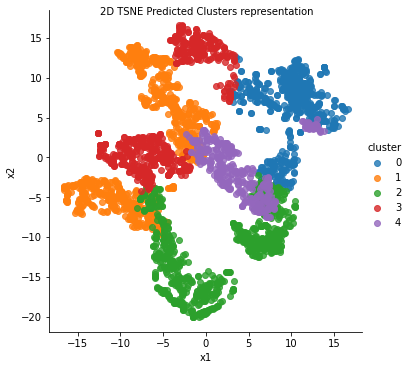

In [39]:
lm = sns.lmplot(data=dftsne, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
fig = lm.fig 
fig.suptitle("2D TSNE Predicted Clusters representation", fontsize=10)

Text(0.5, 0.98, '2D TSNE Ground Truth with 83% representation')

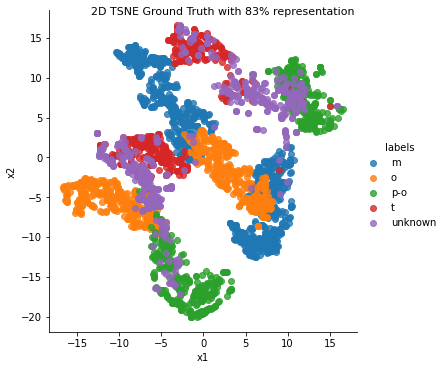

In [40]:
# dftsne.drop(columns = ['cluster'])

lm = sns.lmplot(data=dftsne, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
fig = lm.fig 
fig.suptitle("2D TSNE Ground Truth with 83% representation", fontsize=11)

In [41]:
import plotly.express as px
fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [42]:
import plotly.express as px
dftsne3D = dftsne[['x1', 'x2', 'x3' ,'cluster']]

fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [ ]:
dftsne.head(40)

In [ ]:
dftsne_times = dftsne.groupby(["labels", "cluster"]).size().reset_index(name="Time")


unknown_df = dftsne_times[dftsne_times['labels'].str.match('unknown')]
m_df = dftsne_times[dftsne_times['labels'].str.match('m')]
po_df = dftsne_times[dftsne_times['labels'].str.match('p-o')]
o_df = dftsne_times[dftsne_times['labels'].str.match('o')]
t_df = dftsne_times[dftsne_times['labels'].str.match('t')]

unk_newlabel = unknown_df.loc[unknown_df['Time'] == unknown_df.Time.max(), 'cluster'].values[0]
m_newlabel = m_df.loc[m_df['Time'] == m_df.Time.max(), 'cluster'].values[0]
po_newlabel = po_df.loc[po_df['Time'] == po_df.Time.max(), 'cluster'].values[0]
o_newlabel = o_df.loc[o_df['Time'] == o_df.Time.max(), 'cluster'].values[0]
t_newlabel = t_df.loc[t_df['Time'] == t_df.Time.max(), 'cluster'].values[0]

In [ ]:
dftsne_times

In [ ]:
dftsne = dftsne.replace({'m': m_newlabel, 'p-o': po_newlabel, 'o': o_newlabel, 't':t_newlabel , 'unknown': unk_newlabel})
dftsne

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dftsne['labels'], dftsne['cluster'])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dftsne['labels'], dftsne['cluster'])

In [ ]:
def tsne_algo(X, perplexity):
    
    from sklearn.manifold import TSNE
    n_components = 3
    Xtsne = TSNE(n_components, perplexity = perplexity).fit_transform(X)
    dftsne = pd.DataFrame(Xtsne)
    dftsne['labels'] = labels_true
    return dftsne

In [ ]:
def kmeans_algo(dftsne):
    
    kmeans = KMeans(n_clusters=5)
    tsne_labels = kmeans.fit_predict(dftsne[[0, 1, 2]])
    dftsne['cluster'] = tsne_labels
    dftsne.columns = ['x1','x2','x3','labels', 'cluster']
    return dftsne


In [ ]:
def sort_clusterlabels(dftsne_kmeans):
    dftsne_times = dftsne_kmeans.groupby(["labels", "cluster"]).size().reset_index(name="Time")
    
    unknown_df = dftsne_times[dftsne_times['labels'].str.match('unknown')]
    m_df = dftsne_times[dftsne_times['labels'].str.match('m')]
    po_df = dftsne_times[dftsne_times['labels'].str.match('p-o')]
    o_df = dftsne_times[dftsne_times['labels'].str.match('o')]
    t_df = dftsne_times[dftsne_times['labels'].str.match('t')]
    
    unk_newlabel = unknown_df.loc[unknown_df['Time'] == unknown_df.Time.max(), 'cluster'].values[0]
    m_newlabel = m_df.loc[m_df['Time'] == m_df.Time.max(), 'cluster'].values[0]
    po_newlabel = po_df.loc[po_df['Time'] == po_df.Time.max(), 'cluster'].values[0]
    o_newlabel = o_df.loc[o_df['Time'] == o_df.Time.max(), 'cluster'].values[0]
    t_newlabel = t_df.loc[t_df['Time'] == t_df.Time.max(), 'cluster'].values[0]
    
    dftsne_kmeans = dftsne_kmeans.replace({'m': m_newlabel, 
                             'p-o': po_newlabel, 
                             'o': o_newlabel, 
                             't':t_newlabel , 
                             'unknown': unk_newlabel})
    return dftsne_kmeans

In [ ]:
from sklearn.metrics import accuracy_score
perplexity = list(range(20, 100, 1))
performance = []
for perplex in perplexity: 
    dftsne = tsne_algo(X, perplex)
    dftsne_kmeans = kmeans_algo(dftsne)
    dftsne_kmeans = sort_clusterlabels(dftsne_kmeans)
    acc = accuracy_score(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])
    performance.append(acc)
    
    
perf_dic = dict(zip(perplexity, performance))
print('Best value of performance: ' 
      + str(max(perf_dic.values())) 
      + ' Perplexity = ' 
      + str(max(perf_dic, key=perf_dic.get)))

In [ ]:
perf_dic

In [ ]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=60).fit(dftsne[['x1','x2','x3']])
dftsne['optic_labels'] = clustering.labels_

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['optic_labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='optics 3D Prediction '
)
fig.show()